In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import os

In [ ]:
df = pd.read_csv('/content/DataAnalyst (1).csv')
print(df)

      Unnamed: 0                                          Job Title  \
0              0  Data Analyst, Center on Immigration and Justic...   
1              1                               Quality Data Analyst   
2              2  Senior Data Analyst, Insights & Analytics Team...   
3              3                                       Data Analyst   
4              4                             Reporting Data Analyst   
...          ...                                                ...   
2248        2248  RQS - IHHA - 201900004460 -1q Data Security An...   
2249        2249              Senior Data Analyst (Corporate Audit)   
2250        2250  Technical Business Analyst (SQL, Data analytic...   
2251        2251                Data Analyst 3, Customer Experience   
2252        2252                        Senior Quality Data Analyst   

                  Salary Estimate  \
0      $37K-$66K (Glassdoor est.)   
1      $37K-$66K (Glassdoor est.)   
2      $37K-$66K (Glassdoor est.)   

In [ ]:
def clean_salary(salary):
    if pd.isna(salary):
        return np.nan

    salary_str = str(salary).lower()
    salary_str = salary_str.replace('(glassdoor est)', '').replace('per year', '').replace('per hour', '').replace('$', '').replace(',', '').strip()

    try:
        if '-' in salary_str:
            parts = salary_str.split('-')
            salary_min = float(parts[0].replace('k', ''))
            salary_max = float(parts[1].replace('k', ''))

            if 'k' in parts[0] or 'k' in parts[1]: # Check if 'k' was in original parts
                salary_min *= 1000
                salary_max *= 1000

            return (salary_min + salary_max) / 2
        elif 'k' in salary_str:
            return float(salary_str.replace('k', '')) * 1000
        else:
            return float(salary_str)
    except ValueError:
        return np.nan


df['Avg Salary'] = df['Salary Estimate'].apply(clean_salary)

print("First 5 rows of 'Salary Estimate' and 'Avg Salary' after cleaning:")
print(df[['Salary Estimate', 'Avg Salary']].head())
print("\nNumber of NaN values in 'Avg Salary':", df['Avg Salary'].isnull().sum())

First 5 rows of 'Salary Estimate' and 'Avg Salary' after cleaning:
              Salary Estimate  Avg Salary
0  $37K-$66K (Glassdoor est.)         NaN
1  $37K-$66K (Glassdoor est.)         NaN
2  $37K-$66K (Glassdoor est.)         NaN
3  $37K-$66K (Glassdoor est.)         NaN
4  $37K-$66K (Glassdoor est.)         NaN

Number of NaN values in 'Avg Salary': 2253


In [ ]:
nan_salaries = df[df['Avg Salary'].isnull()]
print("Original 'Salary Estimate' for rows with NaN 'Avg Salary':")
print(nan_salaries['Salary Estimate'].value_counts().head(10))

Original 'Salary Estimate' for rows with NaN 'Avg Salary':
Salary Estimate
$41K-$78K (Glassdoor est.)     57
$42K-$76K (Glassdoor est.)     57
$50K-$86K (Glassdoor est.)     41
$35K-$67K (Glassdoor est.)     33
$60K-$124K (Glassdoor est.)    31
$58K-$93K (Glassdoor est.)     31
$43K-$76K (Glassdoor est.)     31
$46K-$87K (Glassdoor est.)     30
$51K-$87K (Glassdoor est.)     30
$37K-$66K (Glassdoor est.)     30
Name: count, dtype: int64


In [ ]:
import re

def clean_salary(salary):
    if pd.isna(salary) or str(salary).strip() == '-1':
        return np.nan

    salary_str = str(salary).lower()


    salary_str = salary_str.replace('(glassdoor est)', '') \
                         .replace('per year', '') \
                         .replace('per hour', '') \
                         .replace('$', '') \
                         .replace(',', '') \
                         .strip()


    numbers_with_k = re.findall(r'(\d+\.?\d*k?)', salary_str)

    if not numbers_with_k:
        return np.nan

    try:
        if len(numbers_with_k) == 2:
            min_val_str = numbers_with_k[0]
            max_val_str = numbers_with_k[1]

            salary_min = float(min_val_str.replace('k', ''))
            salary_max = float(max_val_str.replace('k', ''))


            if 'k' in min_val_str or 'k' in max_val_str:
                salary_min *= 1000
                salary_max *= 1000

            return (salary_min + salary_max) / 2
        elif len(numbers_with_k) == 1:
            single_val_str = numbers_with_k[0]

            salary_val = float(single_val_str.replace('k', ''))
            if 'k' in single_val_str:
                salary_val *= 1000
            return salary_val
        else:
            return np.nan
    except ValueError:

        return np.nan


df['Avg Salary'] = df['Salary Estimate'].apply(clean_salary)

print("First 5 rows of 'Salary Estimate' and 'Avg Salary' after updated cleaning:")
print(df[['Salary Estimate', 'Avg Salary']].head())
print("\nNumber of NaN values in 'Avg Salary' after updated cleaning:", df['Avg Salary'].isnull().sum())

First 5 rows of 'Salary Estimate' and 'Avg Salary' after updated cleaning:
              Salary Estimate  Avg Salary
0  $37K-$66K (Glassdoor est.)     51500.0
1  $37K-$66K (Glassdoor est.)     51500.0
2  $37K-$66K (Glassdoor est.)     51500.0
3  $37K-$66K (Glassdoor est.)     51500.0
4  $37K-$66K (Glassdoor est.)     51500.0

Number of NaN values in 'Avg Salary' after updated cleaning: 1


In [ ]:
print("Number of NaN values in 'Rating' before dropping:", df['Rating'].isnull().sum())

Number of NaN values in 'Rating' before dropping: 272


In [ ]:
df.dropna(subset=['Rating'], inplace=True)
print("Number of NaN values in 'Rating' after dropping rows:", df['Rating'].isnull().sum())
print("New shape of the DataFrame after removing NaN rating rows:", df.shape)

Number of NaN values in 'Rating' after dropping rows: 0
New shape of the DataFrame after removing NaN rating rows: (1980, 17)


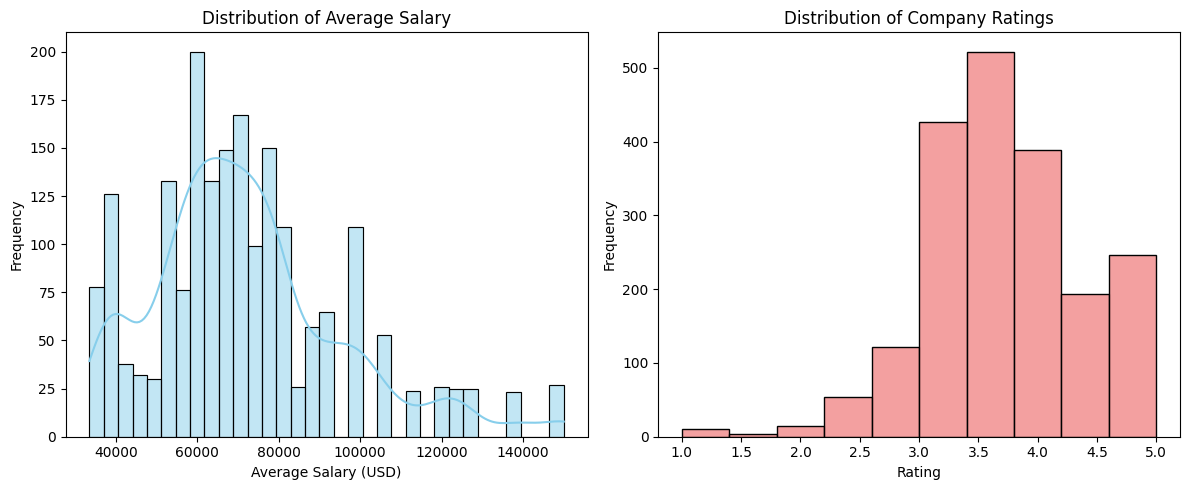

In [ ]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.histplot(df['Avg Salary'], kde=True, color='skyblue')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Salary')


plt.subplot(1, 2, 2)
sns.histplot(df['Rating'], kde=False, bins=10, color='lightcoral')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Company Ratings')

plt.tight_layout()
plt.show()


In [ ]:
skills_list = ["python","sql","exel","power bi","tableau","pandas","numpy","matplotlib","seaborn","machine learning","deep learning","aws","azure","statistics","data analysis","tensorflow","pytorch"]


In [ ]:
import re

def clean_text(text):
  text =str(text).lower()
  text = re.sub(r"[^a-zA-Z0-9\s]","",text)
  return text

def extract_skills(job_description_text):
    cleaned_description = clean_text(job_description_text)
    skills_found =[]
    for skill in skills_list:
      if skill.lower() in cleaned_description:
        skills_found.append(skill)
    return skills_found

In [ ]:
print(df[['Job Description']].head())

                                     Job Description
0  Are you eager to roll up your sleeves and harn...
1  Overview\n\nProvides analytical and technical ...
2  We’re looking for a Senior Data Analyst who ha...
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...


In [ ]:
df['Extracted_skills'] = df['Job Description'].apply(extract_skills)
print("First 5 rows with 'Job Description' and 'Extracted_skills':")
print(df[['Job Description', 'Extracted_skills']].head())

First 5 rows with 'Job Description' and 'Extracted_skills':
                                     Job Description  \
0  Are you eager to roll up your sleeves and harn...   
1  Overview\n\nProvides analytical and technical ...   
2  We’re looking for a Senior Data Analyst who ha...   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...   

                     Extracted_skills  
0      [python, sql, aws, statistics]  
1    [sql, statistics, data analysis]  
2              [python, sql, tableau]  
3  [sql, tableau, aws, data analysis]  
4        [python, sql, data analysis]  


In [ ]:
from collections import Counter
all_skills = [skill for skills in df["Extracted_skills"]for skill in skills]
skill_counts = Counter(all_skills)
skill_df = pd.DataFrame(skill_counts.items(),columns =["Skills","Count"]).sort_values(by="Count",ascending=False)
print(skill_df.head(10))

              Skills  Count
1                sql   1389
4      data analysis    720
0             python    637
5            tableau    620
3         statistics    563
2                aws    275
6   machine learning    180
9           power bi    180
13             azure     64
7             pandas     41


In [ ]:
total_jobs =len(df)
skill_df["Job_Percentage"] = (skill_df["Count"]/total_jobs)*100
high_demand_skills = skill_df[skill_df["Job_Percentage"]>=30]
print(high_demand_skills)

          Skills  Count  Job_Percentage
1            sql   1389       61.651132
4  data analysis    720       31.957390


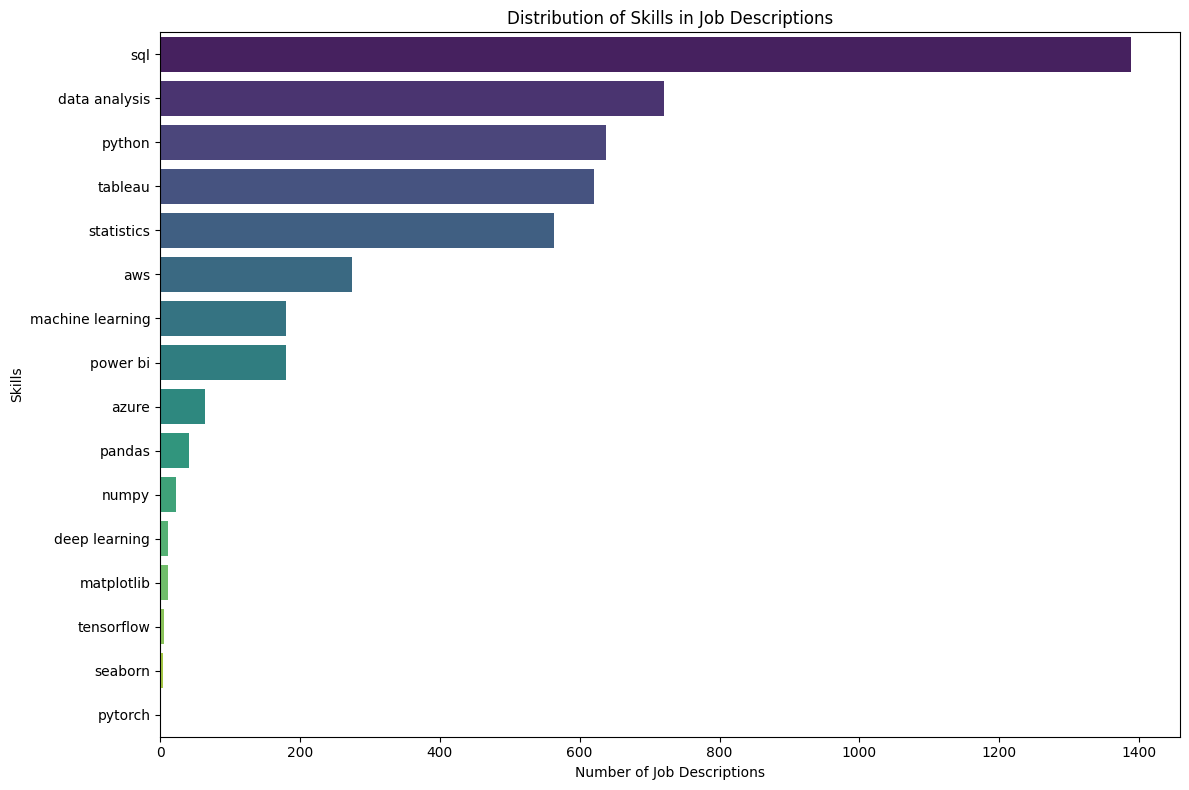

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Skills', data=skill_df, palette='viridis', hue='Skills', legend=False)
plt.title('Distribution of Skills in Job Descriptions')
plt.xlabel('Number of Job Descriptions')
plt.ylabel('Skills')
plt.tight_layout()
plt.show()

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'Extracted_skills'],
      dtype='object')


In [ ]:
import re

def clean_revenue(revenue):
    if pd.isna(revenue) or revenue == '-1' or 'unknown' in str(revenue).lower():
        return np.nan

    revenue_str = str(revenue).lower().replace('$', '').replace('(usd)', '').strip()

    if 'billion' in revenue_str:
        revenue_str = revenue_str.replace('billion', 'e9')
    elif 'million' in revenue_str:
        revenue_str = revenue_str.replace('million', 'e6')

    if '-' in revenue_str:
        parts = revenue_str.split('-')
        try:
            min_val = float(re.findall(r'\d+\.?\d*e?\d*', parts[0])[0])
            max_val = float(re.findall(r'\d+\.?\d*e?\d*', parts[1])[0])
            return (min_val + max_val) / 2
        except (ValueError, IndexError):
            return np.nan
    elif '+' in revenue_str:
        try:

            return float(re.findall(r'\d+\.?\d*e?\d*', revenue_str)[0])
        except (ValueError, IndexError):
            return np.nan
    else:
        try:
            return float(re.findall(r'\d+\.?\d*e?\d*', revenue_str)[0])
        except (ValueError, IndexError):
            return np.nan

df['Cleaned_Revenue'] = df['Revenue'].apply(clean_revenue)

print("First 5 rows of 'Revenue' and 'Cleaned_Revenue' after cleaning:")
print(df[['Revenue', 'Cleaned_Revenue']].head())
print("\nNumber of NaN values in 'Cleaned_Revenue':", df['Cleaned_Revenue'].isnull().sum())

First 5 rows of 'Revenue' and 'Cleaned_Revenue' after cleaning:
                      Revenue  Cleaned_Revenue
0  $100 to $500 million (USD)            100.0
1      $2 to $5 billion (USD)              2.0
2    Unknown / Non-Applicable              NaN
3   $50 to $100 million (USD)             50.0
4  $100 to $500 million (USD)            100.0

Number of NaN values in 'Cleaned_Revenue': 778


In [ ]:
print("Number of unique Company Names:", df['Company Name'].nunique())
print("Number of unique Locations:", df['Location'].nunique())

Number of unique Company Names: 1513
Number of unique Locations: 253


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
skill_features = pd.DataFrame(mlb.fit_transform(df['Extracted_skills']), columns=mlb.classes_, index=df.index)

df = pd.concat([df, skill_features], axis=1)

print("Shape of DataFrame after adding skill features:", df.shape)
print("First 5 rows of skill features:")
print(skill_features.head())

Shape of DataFrame after adding skill features: (2253, 34)
First 5 rows of skill features:
   aws  azure  data analysis  deep learning  machine learning  matplotlib  \
0    1      0              0              0                 0           0   
1    0      0              1              0                 0           0   
2    0      0              0              0                 0           0   
3    1      0              1              0                 0           0   
4    0      0              1              0                 0           0   

   numpy  pandas  power bi  python  pytorch  seaborn  sql  statistics  \
0      0       0         0       1        0        0    1           1   
1      0       0         0       0        0        0    1           1   
2      0       0         0       1        0        0    1           0   
3      0       0         0       0        0        0    1           0   
4      0       0         0       1        0        0    1           0   

   tabl

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Encoded_Company_Name'] = le.fit_transform(df['Company Name'])
df['Encoded_Location'] = le.fit_transform(df['Location'])

print("First 5 rows with 'Company Name', 'Encoded_Company_Name', 'Location', 'Encoded_Location':")
print(df[['Company Name', 'Encoded_Company_Name', 'Location', 'Encoded_Location']].head())
print("\nNumber of unique Encoded Company Names:", df['Encoded_Company_Name'].nunique())
print("Number of unique Encoded Locations:", df['Encoded_Location'].nunique())

First 5 rows with 'Company Name', 'Encoded_Company_Name', 'Location', 'Encoded_Location':
                              Company Name  Encoded_Company_Name  \
0           Vera Institute of Justice\n3.2                  1408   
1  Visiting Nurse Service of New York\n3.8                  1430   
2                         Squarespace\n3.4                  1191   
3                            Celerity\n4.1                   248   
4                             FanDuel\n3.9                   473   

       Location  Encoded_Location  
0  New York, NY               154  
1  New York, NY               154  
2  New York, NY               154  
3  New York, NY               154  
4  New York, NY               154  

Number of unique Encoded Company Names: 1514
Number of unique Encoded Locations: 253


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Encoded_Job_Title'] = le.fit_transform(df['Job Title'])

print("First 5 rows with 'Job Title' and 'Encoded_Job_Title':")
print(df[['Job Title', 'Encoded_Job_Title']].head())
print("\nNumber of unique Encoded Job Titles:", df['Encoded_Job_Title'].nunique())

First 5 rows with 'Job Title' and 'Encoded_Job_Title':
                                           Job Title  Encoded_Job_Title
0  Data Analyst, Center on Immigration and Justic...                418
1                               Quality Data Analyst                899
2  Senior Data Analyst, Insights & Analytics Team...               1031
3                                       Data Analyst                234
4                             Reporting Data Analyst                919

Number of unique Encoded Job Titles: 1272


In [ ]:
from sklearn.model_selection import train_test_split

feature_columns = ['Encoded_Company_Name', 'Encoded_Location', 'Cleaned_Revenue'] + list(mlb.classes_)
X = df[feature_columns]
y = df['Encoded_Job_Title']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1802, 19)
Shape of X_test: (451, 19)
Shape of y_train: (1802,)
Shape of y_test: (451,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

imputer = SimpleImputer(strategy='median')


X_train['Cleaned_Revenue'] = imputer.fit_transform(X_train[['Cleaned_Revenue']])
X_test['Cleaned_Revenue'] = imputer.transform(X_test[['Cleaned_Revenue']])


model = LogisticRegression(max_iter=2000, solver='saga', random_state=42, multi_class='multinomial') # Increased max_iter and set multi_class explicitly


model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression model trained successfully.
Training Accuracy: 0.1720
Test Accuracy: 0.1552


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report for the test set
report = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)

# Print the classification report
print("Classification Report for Test Set:")
for key, value in report.items():
    if isinstance(value, dict):
        print(f"  {key}:")
        for metric, score in value.items():
            print(f"    {metric}: {score:.4f}")
    else:
        print(f"  {key}: {value:.4f}")

Classification Report for Test Set:
  2:
    precision: 0.0000
    recall: 0.0000
    f1-score: 0.0000
    support: 1.0000
  4:
    precision: 0.0000
    recall: 0.0000
    f1-score: 0.0000
    support: 1.0000
  8:
    precision: 0.0000
    recall: 0.0000
    f1-score: 0.0000
    support: 1.0000
  10:
    precision: 0.0000
    recall: 0.0000
    f1-score: 0.0000
    support: 1.0000
  27:
    precision: 0.0000
    recall: 0.0000
    f1-score: 0.0000
    support: 1.0000
  30:
    precision: 0.0000
    recall: 0.0000
    f1-score: 0.0000
    support: 1.0000
  31:
    precision: 0.0000
    recall: 0.0000
    f1-score: 0.0000
    support: 1.0000
  32:
    precision: 0.0000
    recall: 0.0000
    f1-score: 0.0000
    support: 1.0000
  35:
    precision: 0.0000
    recall: 0.0000
    f1-score: 0.0000
    support: 1.0000
  38:
    precision: 0.0000
    recall: 0.0000
    f1-score: 0.0000
    support: 1.0000
  45:
    precision: 0.0000
    recall: 0.0000
    f1-score: 0.0000
    support: 1.0000

Weighted Average Metrics for Test Set:
  Precision: 0.0336
  Recall: 0.1552
  F1-Score: 0.0553


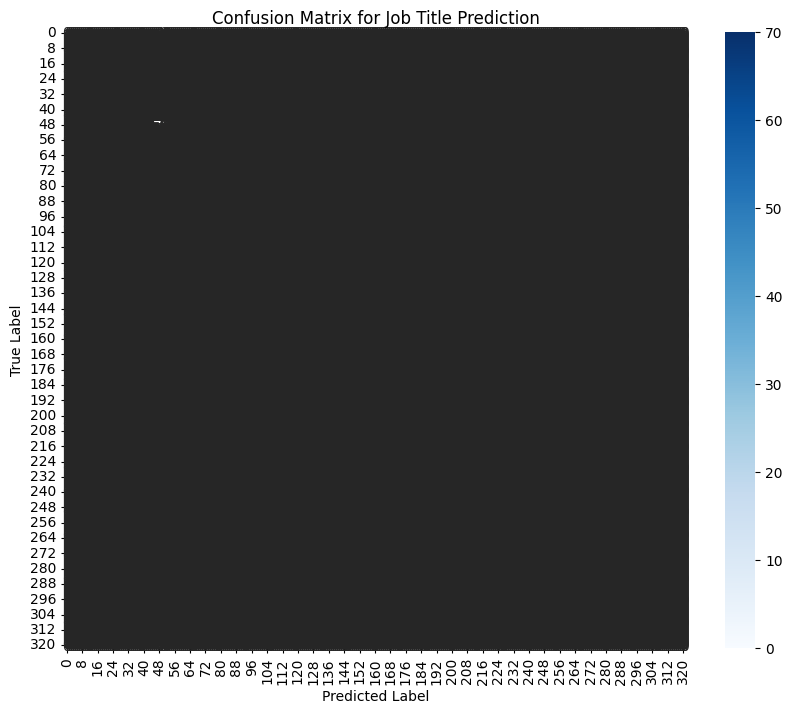


Model Performance Summary:
The Logistic Regression model achieved a test accuracy of 0.1552.
The weighted average precision is 0.0336, meaning that when the model predicts a job title, it is correct about 3.36% of the time, considering class imbalances.
The weighted average recall is 0.1552, indicating that the model correctly identifies about 15.52% of all actual job titles, considering class imbalances.
The weighted average F1-score is 0.0553, which is the harmonic mean of precision and recall, providing a balanced measure of the model's accuracy, considering class imbalances.
The confusion matrix further illustrates that the model struggles to differentiate between many job titles, as most predictions fall into a few dominant classes. This is evident from the low individual class precision and recall values, and the high concentration of predictions along a few rows/columns in the confusion matrix. The overall performance metrics (precision, recall, f1-score) are very low, suggesti

In [ ]:
print("Weighted Average Metrics for Test Set:")
print(f"  Precision: {report['weighted avg']['precision']:.4f}")
print(f"  Recall: {report['weighted avg']['recall']:.4f}")
print(f"  F1-Score: {report['weighted avg']['f1-score']:.4f}")



cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Job Title Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


print("\nModel Performance Summary:")
print(f"The Logistic Regression model achieved a test accuracy of {test_accuracy:.4f}.")
print(f"The weighted average precision is {report['weighted avg']['precision']:.4f}, meaning that when the model predicts a job title, it is correct about {report['weighted avg']['precision']:.2%} of the time, considering class imbalances.")
print(f"The weighted average recall is {report['weighted avg']['recall']:.4f}, indicating that the model correctly identifies about {report['weighted avg']['recall']:.2%} of all actual job titles, considering class imbalances.")
print(f"The weighted average F1-score is {report['weighted avg']['f1-score']:.4f}, which is the harmonic mean of precision and recall, providing a balanced measure of the model's accuracy, considering class imbalances.")
print("The confusion matrix further illustrates that the model struggles to differentiate between many job titles, as most predictions fall into a few dominant classes. This is evident from the low individual class precision and recall values, and the high concentration of predictions along a few rows/columns in the confusion matrix. The overall performance metrics (precision, recall, f1-score) are very low, suggesting that the model is not performing well for this multi-class classification task, likely due to the large number of unique job titles and imbalanced class distribution.")

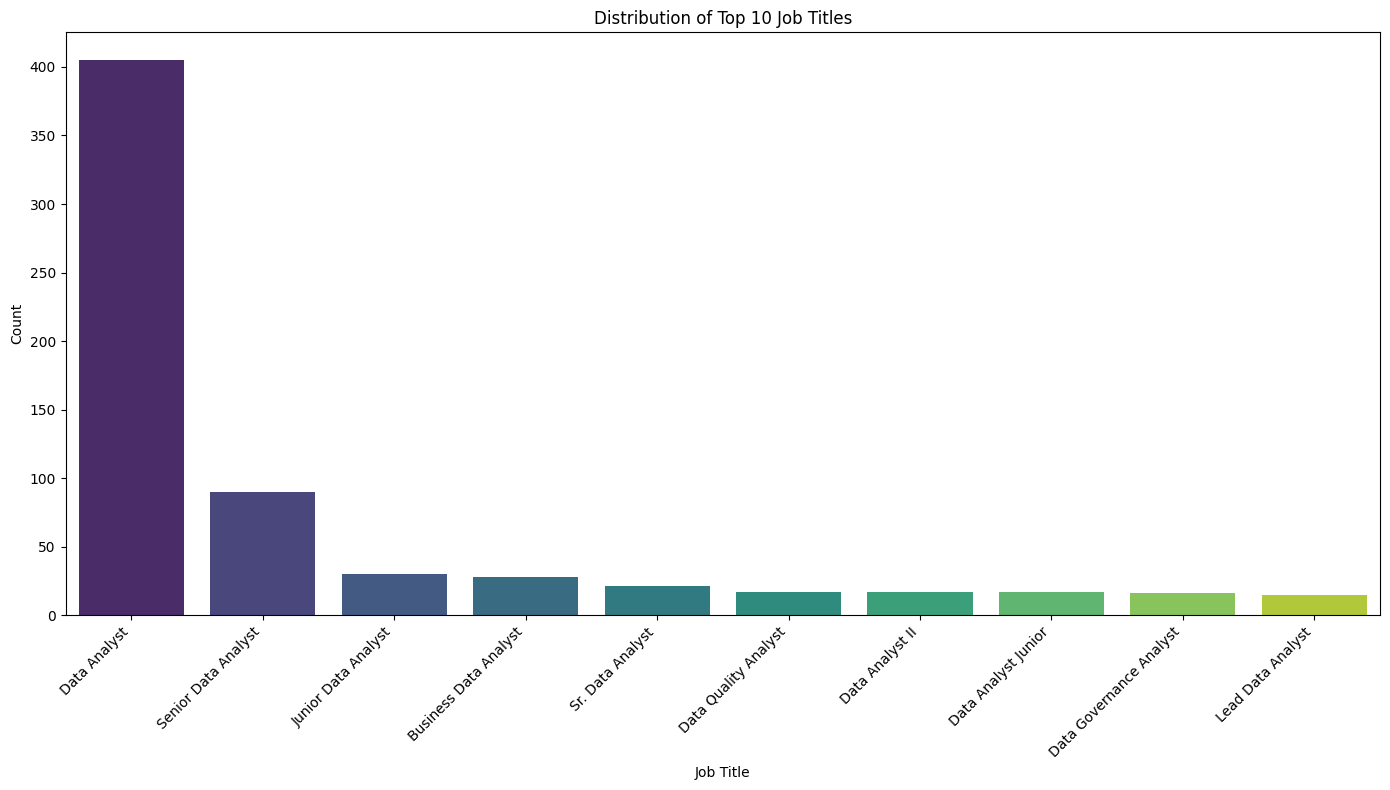

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
job_title_counts = df['Encoded_Job_Title'].value_counts()


top_10_job_titles_encoded = job_title_counts.head(10)


top_10_job_titles_original = le.inverse_transform(top_10_job_titles_encoded.index)


plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_job_titles_original, y=top_10_job_titles_encoded.values, palette='viridis', hue=top_10_job_titles_original, legend=False)
plt.title('Distribution of Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()